# <center><u> Exploratory Data Analysis</u> </center>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from google.colab import files
import io
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
 

data = files.upload()

Saving data.csv to data.csv


In [ ]:

data_file = pd.read_csv('data.csv')
data_file.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 3. Check the datatypes

In [ ]:

data_file.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:


cols_to_drop =  ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]


In [ ]:

data_file.drop(cols_to_drop,axis = 1,inplace = True)
print(data_file.head)

<bound method NDFrame.head of           Make       Model  Year  Engine HP  Engine Cylinders  \
0          BMW  1 Series M  2011      335.0               6.0   
1          BMW    1 Series  2011      300.0               6.0   
2          BMW    1 Series  2011      300.0               6.0   
3          BMW    1 Series  2011      230.0               6.0   
4          BMW    1 Series  2011      230.0               6.0   
...        ...         ...   ...        ...               ...   
11909    Acura         ZDX  2012      300.0               6.0   
11910    Acura         ZDX  2012      300.0               6.0   
11911    Acura         ZDX  2012      300.0               6.0   
11912    Acura         ZDX  2013      300.0               6.0   
11913  Lincoln      Zephyr  2006      221.0               6.0   

      Transmission Type      Driven_Wheels  highway MPG  city mpg   MSRP  
0                MANUAL   rear wheel drive           26        19  46135  
1                MANUAL   rear wheel dr

In [ ]:
rename_cols = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
               "Driven_Wheels": "Drive Mode","highway MPG": "MPG_H", "city mpg": "MPG-C", "MSRP": "Price" }

In [ ]:


data_file.rename(columns=rename_cols,inplace=True)

In [ ]:

data_file.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:

data_file.count()


Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG_H           11914
MPG-C           11914
Price           11914
dtype: int64

In [ ]:

data_file.drop_duplicates(inplace = True)
print(data_file.head())



  Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG_H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500  


In [ ]:

data_file.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG_H           10925
MPG-C           10925
Price           10925
dtype: int64

In [ ]:

data_file.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG_H            0
MPG-C            0
Price            0
dtype: int64

In [ ]:

data_file.dropna(inplace = True)

In [ ]:

data_file.isnull().sum()


Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG_H           0
MPG-C           0
Price           0
dtype: int64

In [ ]:

data_file.describe()

,Year,HP,Cylinders,MPG_H,MPG-C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


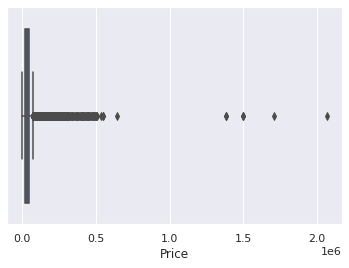

In [ ]:

sns.boxplot(x=data_file['Price'])

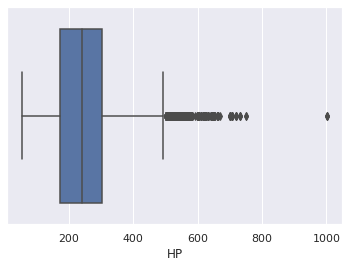

In [ ]:

sns.boxplot(x = data_file['HP'])

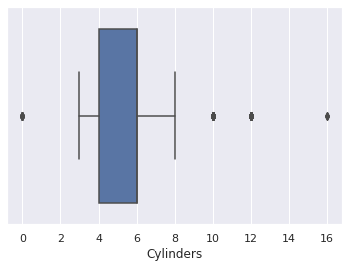

In [ ]:

sns.boxplot(x = data_file['Cylinders'])

In [ ]:

data_file.select_dtypes(include = ['int64','float64'])


,Year,HP,Cylinders,MPG_H,MPG-C,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


In [ ]:
I=['Year','HP','Cylinders','MPG_H','MPG-C','Price']


In [ ]:

Q1 = data_file.quantile(0.25)
Q3 = data_file.quantile(0.75)
IQR = Q3-Q1
lower_value = Q1-1.5*IQR
upper_value = Q3+1.5*IQR

data_clean = data_file[~((data_file < lower_value) | (data_file > upper_value)).any(axis=1)]
print(data_clean)

          Make       Model  Year     HP  Cylinders Transmission  \
0          BMW  1 Series M  2011  335.0        6.0       MANUAL   
1          BMW    1 Series  2011  300.0        6.0       MANUAL   
2          BMW    1 Series  2011  300.0        6.0       MANUAL   
3          BMW    1 Series  2011  230.0        6.0       MANUAL   
4          BMW    1 Series  2011  230.0        6.0       MANUAL   
...        ...         ...   ...    ...        ...          ...   
11909    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

              Drive Mode  MPG_H  MPG-C  Price  
0       rear wheel drive     26     19  46135  
1       rear wheel drive     28     19  40650  
2       rear wheel drive     28     20  36350  
3  

In [ ]:
# calculate absolute zscore values for each columns present in l, save it in variable z. Print z
z_score = np.abs(stats.zscore(data_file[I]))


In [ ]:

data_file3 = data_file[(z_score<3).all(axis=1)]
print(data_file3)


          Make       Model  Year     HP  Cylinders Transmission  \
0          BMW  1 Series M  2011  335.0        6.0       MANUAL   
1          BMW    1 Series  2011  300.0        6.0       MANUAL   
2          BMW    1 Series  2011  300.0        6.0       MANUAL   
3          BMW    1 Series  2011  230.0        6.0       MANUAL   
4          BMW    1 Series  2011  230.0        6.0       MANUAL   
...        ...         ...   ...    ...        ...          ...   
11909    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

              Drive Mode  MPG_H  MPG-C  Price  
0       rear wheel drive     26     19  46135  
1       rear wheel drive     28     19  40650  
2       rear wheel drive     28     20  36350  
3  

In [ ]:
print(data_file.shape)
print(data_clean.shape)
print(data_file3.shape)

(10827, 10)
(9191, 10)
(10338, 10)


In [ ]:

make = data_file3['Make'].value_counts()


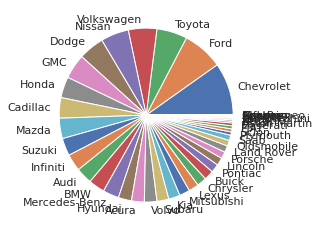

In [ ]:

plt.pie(make,labels = make.index)
plt.show()


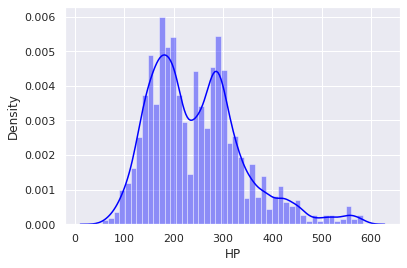

In [ ]:
#ploting distplot for variable HP
sns.distplot(data_file3.HP,hist=True,color='blue')


Text(0.5, 1.0, 'Number of cars by make')

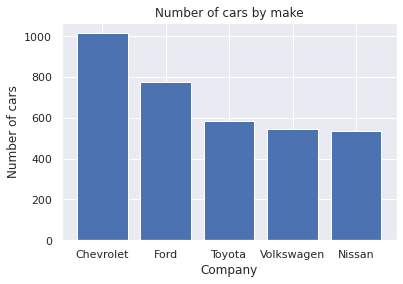

In [ ]:
#bar plot depicting number of cars made by each brand
sorted_make = make.sort_values(ascending=False)
top_5=sorted_make[:5]
plt.bar(top_5.index,top_5)
plt.xlabel("Company")
plt.ylabel("Number of cars")
plt.title("Number of cars by make")


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

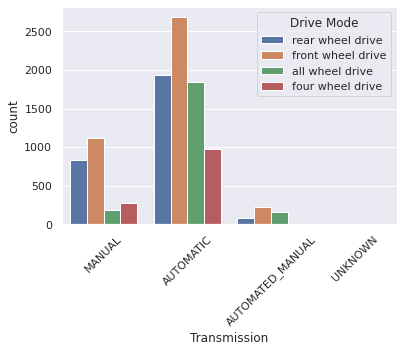

In [ ]:
ax= sns.countplot(x="Transmission",hue="Drive Mode",data = data_file3)
plt.xticks(rotation=45)



# Visualising Bivariate Distributions


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




Text(0, 0.5, 'Price')

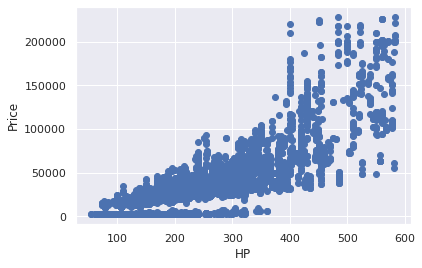

In [ ]:
## Scatter plot to find correlation 

plt.scatter(x='HP',y='Price',data = data_file3)
plt.xlabel('HP')
plt.ylabel('Price')


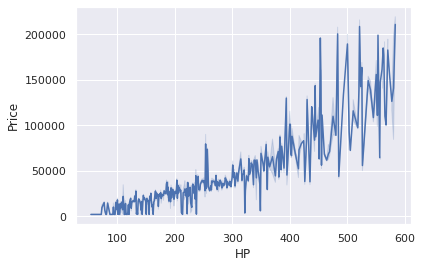

In [ ]:
sns.lineplot(data_file3['HP'],data_file3['Price'])



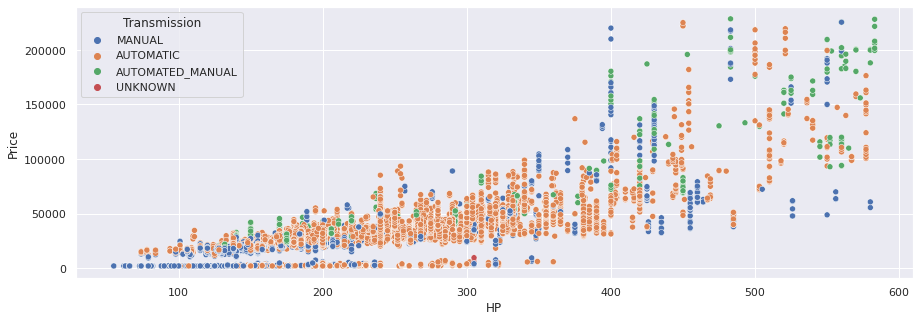

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='HP',y='Price',hue = "Transmission",data = data_file3,markers=True)